# Домашнє завдання: Інтерактивні візуалізації з Plotly

## Опис завдання
У цьому домашньому завданні ви будете створювати інтерактивні візуалізації з допомогою бібліотеки Plotly. Ви дізнаєтесь різницю між Plotly Express (швидкі графіки) та Graph Objects (повний контроль), та створите інтерактивний дашборд.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import sys
!{sys.executable} -m pip install plotly



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\a.nemogushcha\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Завантаження даних
df = pd.read_csv(r"C:\Users\a.nemogushcha\Downloads\yulu_rental.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

# Для plotly краще не встановлювати datetime як індекс
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Додаємо назви сезонів
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

## Завдання 1: Базовий інтерактивний лінійний графік (Plotly Express)

**Завдання:**
Створіть інтерактивний лінійний графік динаміки оренди за часом (рівень деталізації - як в даних) з можливістю zoom та hover.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яка перевага інтерактивного графіка над статичним?
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?


In [3]:
daily_count = df.groupby('datetime')['count'].sum().reset_index()

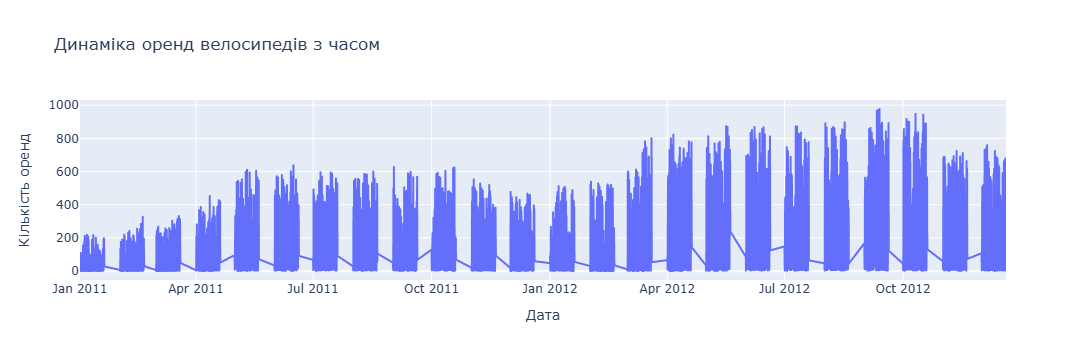

In [4]:
fig = px.line(daily_count,
              x='datetime', y='count',
              title='Динаміка оренд велосипедів з часом',
              labels={'datetime': 'Дата', 'count': 'Кількість оренд'})
fig.show()


1. Інтерактивний графік дозволяє наводити мишкою та бачити значення, що допомогає швидше досліджувати великі обсяги даних без зміни коду
2. Тому що є дні в яких відсутні дані

## Завдання 2: Scatter plot з додатковими даними (Plotly Express)

**Завдання:**
Створіть scatter plot кількості орендованих велосипедів випадковими користувачами vs кількості орендованих велосипедів зареєстрованими користувачами. Розмір точок встановіть за сумарною кількістю велосипедів, які були взяті в оренду, а колір - за сезоном. В hover_data - додайте деталі, які допоможуть вам в подальшому аналізі.

Дослідіть графік. Зверніть увагу, що ви можете вмикати і вимикати окремі сезони, якщо будете клікати на колір сезону в легенді графіку.

**Дайте відповідь на питання.**
- Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?
- Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.

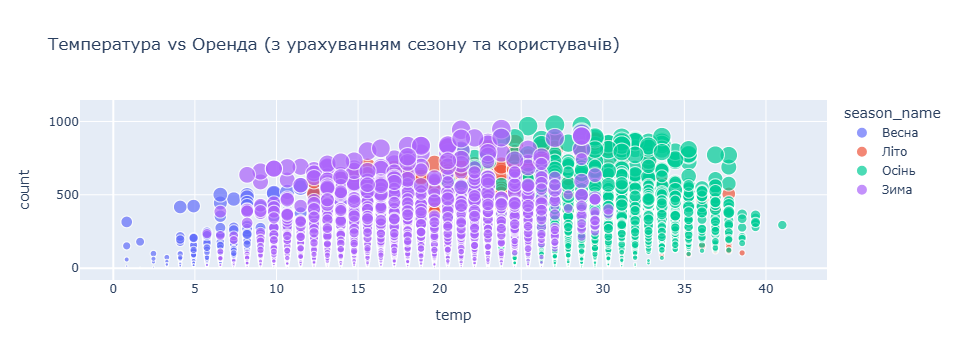

In [5]:
fig = px.scatter(df,
                 x='temp', y='count',
                 size='registered',
                 color='season_name',
                 title='Температура vs Оренда (з урахуванням сезону та користувачів)',
                 hover_data=['humidity', 'windspeed'])
fig.show()

Менша температура то менше оренд
Пи комфортній температурі 20-30 градусів оренд більше.
Розмір точок показує кількість зареєстрованих користувачів, чим більше- тим більше оренд
Кольори - сезони. Зимою і восени оренд більше, ніж весною і літом

## Завдання 3: Порівняння Plotly Express vs Graph Objects

**Завдання:**
Створіть лінійний графік помісячної динаміки оренди велосипедів двома способами - з Plotly Express та з Graph Objects.

**Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
2. Коли краще використовувати Plotly Express?
3. Коли потрібен Graph Objects?


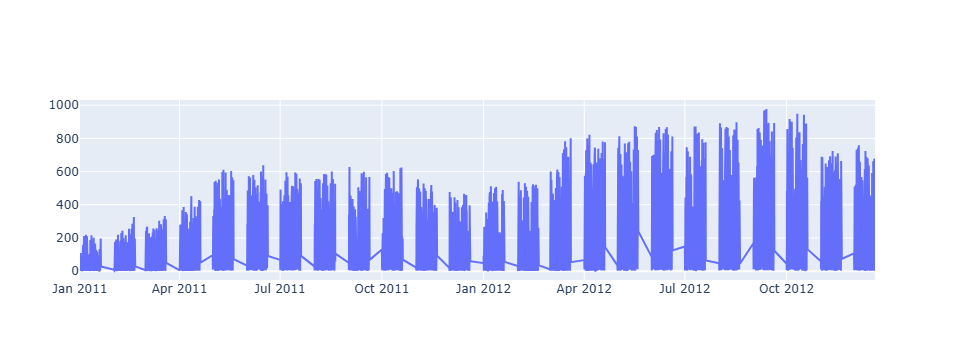

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_count['datetime'],
                         y=daily_count['count'],
                         mode='lines',
                         name='Оренда'))


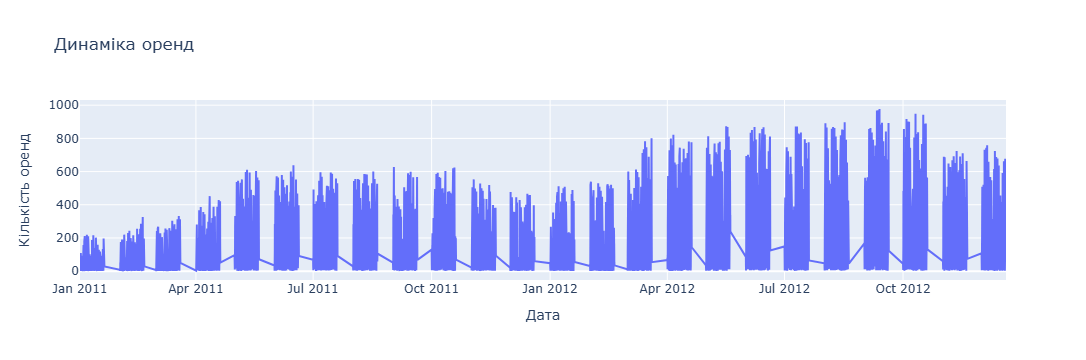

In [9]:

fig.update_layout(title='Динаміка оренд',
                  xaxis_title='Дата',
                  yaxis_title='Кількість оренд')
fig.show()

In [ ]:
Якщо чесно різниці не бачу. Тільки в Graph Objects трішки меньше коду і є підписи осей

## Завдання 4: Дашборд з make_subplots (Graph Objects)

**Завдання:**
Створіть дашборд з 4 різними графіками в одній фігурі:
- Bar chart - середні значення загальної кількості оренд велосипедів за сезонами
- Pie chart - відсоткове співвідношення погодних умов в даних
- Line chart - середнє значення загальної кількості оренд велосипедів за годинами протягом доби
- Scatter plot - кореляція температури vs вологість

Додайте заголовок на дашборд.

**Дайте відповідь на питання**
- На ваш погляд, яка перевага об'єднання графіків в один дашборд?

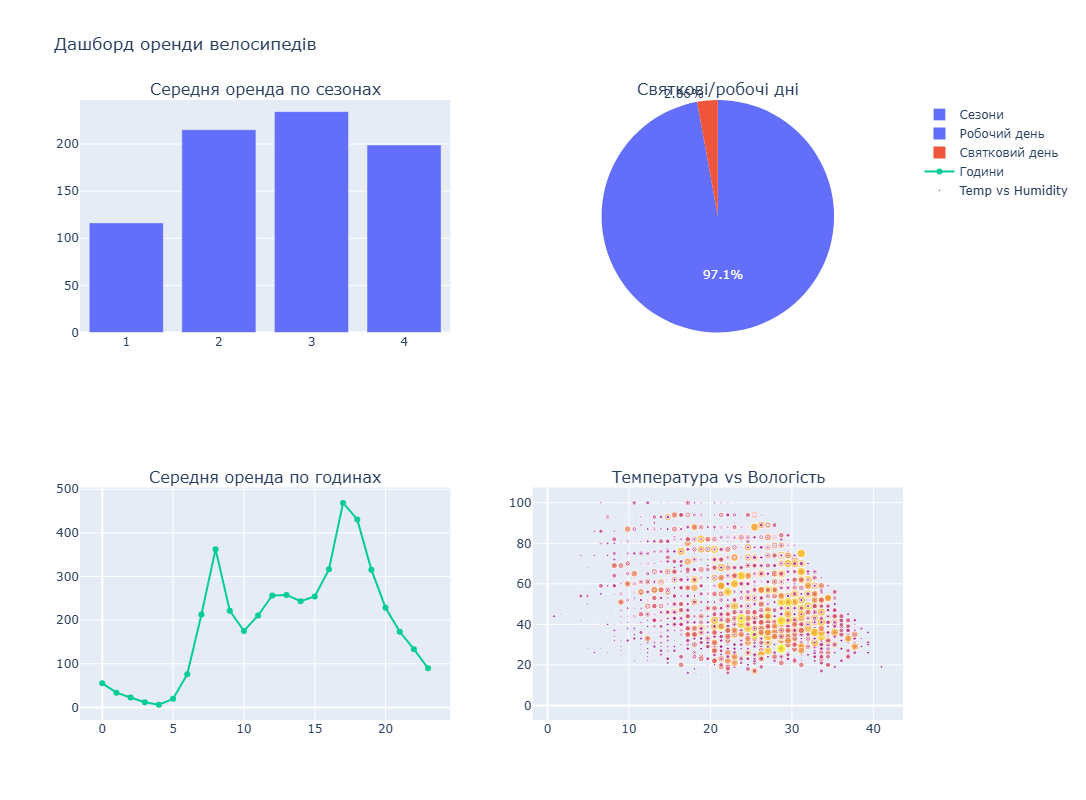

In [16]:
season_avg = df.groupby('season')['count'].mean()
holiday_count = df['holiday'].value_counts()
hour_avg = df.groupby('hour')['count'].mean()
scatter_data = df[['temp','humidity','count']]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Середня оренда по сезонах", "Святкові/робочі дні",
                    "Середня оренда по годинах", "Температура vs Вологість"),
    specs=[[{"type": "xy"}, {"type": "domain"}],
           [{"type": "xy"}, {"type": "xy"}]]
)

# Bar
fig.add_trace(go.Bar(x=season_avg.index, y=season_avg.values, name="Сезони"), row=1, col=1)

# Pie
fig.add_trace(go.Pie(labels=['Робочий день','Святковий день'],
                     values=holiday_count.values, name="Свята"), row=1, col=2)

# Line
fig.add_trace(go.Scatter(x=hour_avg.index, y=hour_avg.values,
                         mode='lines+markers', name="Години"), row=2, col=1)

# Scatter
fig.add_trace(go.Scatter(
    x=scatter_data['temp'], y=scatter_data['humidity'],
    mode='markers', marker=dict(size=scatter_data['count']*0.01, color=scatter_data['count']),
    name="Temp vs Humidity"), row=2, col=2)

fig.update_layout(height=800, width=900, title_text="Дашборд оренди велосипедів")
fig.show()

In [ ]:
Так набагато зручніше робити висновки і аналізувати декілька критеріів за раз 

## Завдання 5: 3D візуалізація

**Завдання:**
Створіть 3D scatter plot для аналізу взаємозв'язку температури, швидкості вітру та загальної кількості орендованих велосипедів. Колір встановіть за сезоном, а розмір - за загальною кількість оренд також.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
2. Чи видно кластери в 3D просторі?
3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?



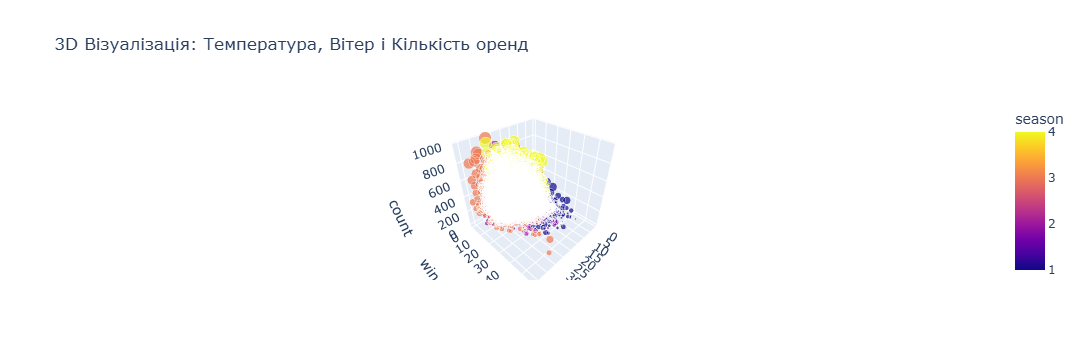

In [3]:
fig = px.scatter_3d(
    df, 
    x='temp', y='windspeed', z='count',
    color='season', size='count',
    title="3D Візуалізація: Температура, Вітер і Кількість оренд"
)
fig.show()


На мій погляд для детального аналізу краще робити кілька 2D графіків, бо їх легше читати
3D дає швидкий огляд складних взаємозв’язків. але як на мене він не зрозумілий, не знаю як його аналізувати 


## Завдання 6: Експорт та збереження інтерактивних графіків

**Завдання:**
Збережіть побудований раніше дашборд в формат HTML. Також змініть вручну щось на дашборді (зум, виділення частини графіку) і збережіть його як статичне зображення через іконку фотоапарату у формат PNG. Завантажте файли з дашбордом у HTML та PNG (або посилання на них на github) разом з посиланням на цей ноутбук при здачі ДЗ.


In [19]:
fig.write_html("dashboard.html")

In [4]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\a.nemogushcha\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [5]:
!{sys.executable} -m pip install -U kaleido


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\a.nemogushcha\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [6]:
import plotly.io as pio
pio.kaleido.scope.default_format = "png"
pio.write_image(fig, "dashboard.png")


C:\Users\a.nemogushcha\AppData\Local\Temp\ipykernel_4428\539841481.py:2: DeprecationWarning:


Use of plotly.io.kaleido.scope.default_format is deprecated and support will be removed after September 2025.
Please use plotly.io.defaults.default_format instead.


